In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
import kaggle
import math

## Downloading and loading the dataset

In [4]:
#Download dataset from Kaggle
!kaggle datasets download -d henryshan/sleep-health-and-lifestyle

Dataset URL: https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle
License(s): MIT


In [5]:
#Unzip dataset
zipfile_name = 'sleep-health-and-lifestyle.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

## Explore dataset

In [2]:
#Load csv file into dataframe and check info
sleep = pd.read_csv('ss.csv')
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


Only Sleep Disorder column has null values cause most of the people in the dataset do not have sleep disorders

In [3]:
#Replace Nan values with 'None' in Sleeep Disorder column
sleep['Sleep Disorder'] = sleep['Sleep Disorder'].fillna('None')

In [4]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
#Show statistics summary
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,187.000000,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,107.820066,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,373.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
print('Unique Values of Occupation are', sleep['Occupation'].unique())
print('nique Values of Sleep Disorder are', sleep['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
nique Values of Sleep Disorder are ['None' 'Sleep Apnea' 'Insomnia']


In [7]:
#Check for max value of specific health indicators 
health_columns = ['Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Blood Pressure', 'Sleep Duration', 'Heart Rate', 'Daily Steps', 'Age']

for col in health_columns:
    max_value = sleep[col].max()
    print(f'{col} max value is "{max_value}"')


Quality of Sleep max value is "9"
Physical Activity Level max value is "90"
Stress Level max value is "8"
Blood Pressure max value is "142/92"
Sleep Duration max value is "8.5"
Heart Rate max value is "86"
Daily Steps max value is "10000"
Age max value is "59"


## Data Preprocessing

In [8]:
#Convert BMI to numeric values for charts
sleep['BMI Category'] = sleep['BMI Category'].replace('Normal Weight', 'Normal') #Convert 'Normal weight to 'Normal'
bmi_mapping = {
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}

sleep['BMI Cat Numeric'] = sleep['BMI Category'].map(bmi_mapping)

In [9]:
#Convert Sleep Disorder to numeric values for charts
disorder_mapping = {
    'None': 1,
    'Sleep Apnea': 2,
    'Insomnia': 3
}

sleep['Sleep Disorder Num'] = sleep['Sleep Disorder'].map(disorder_mapping)

In [10]:
#Convert Gender to numeric values for charts
gender_mapping = {
    'Male': 1,
    'Female': 2
}

sleep['Gender Num'] = sleep['Gender'].map(gender_mapping)

In [11]:
#Separate Blood Pressure between high and low values
sleep = pd.concat([sleep, sleep['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
#Code above is commented out cause it was already executed and can't be executed again
sleep = sleep.rename(columns={0: 'Blood Pressure High', 1: 'Blood Pressure Low'})

In [12]:
#Convert Blood Pressure values to float
sleep['Blood Pressure High'] = sleep['Blood Pressure High'].astype(float)
sleep['Blood Pressure Low'] = sleep['Blood Pressure Low'].astype(float)
sleep['Blood Pressure High'].dtype
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BMI Cat Numeric,Sleep Disorder Num,Gender Num,Blood Pressure High,Blood Pressure Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,2,1,1,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,1,1,1,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,1,1,1,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,3,2,1,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,3,2,1,140.0,90.0


In [13]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Heart Rate               373 non-null    int64  
 10  Daily Steps              373 non-null    int64  
 11  Sleep Disorder           373 non-null    object 
 12  BMI Cat Numeric          373 non-null    int64  
 13  Sleep Disorder Num       373 non-null    int64  
 14  Gender Num               3

## Univariate Analysis

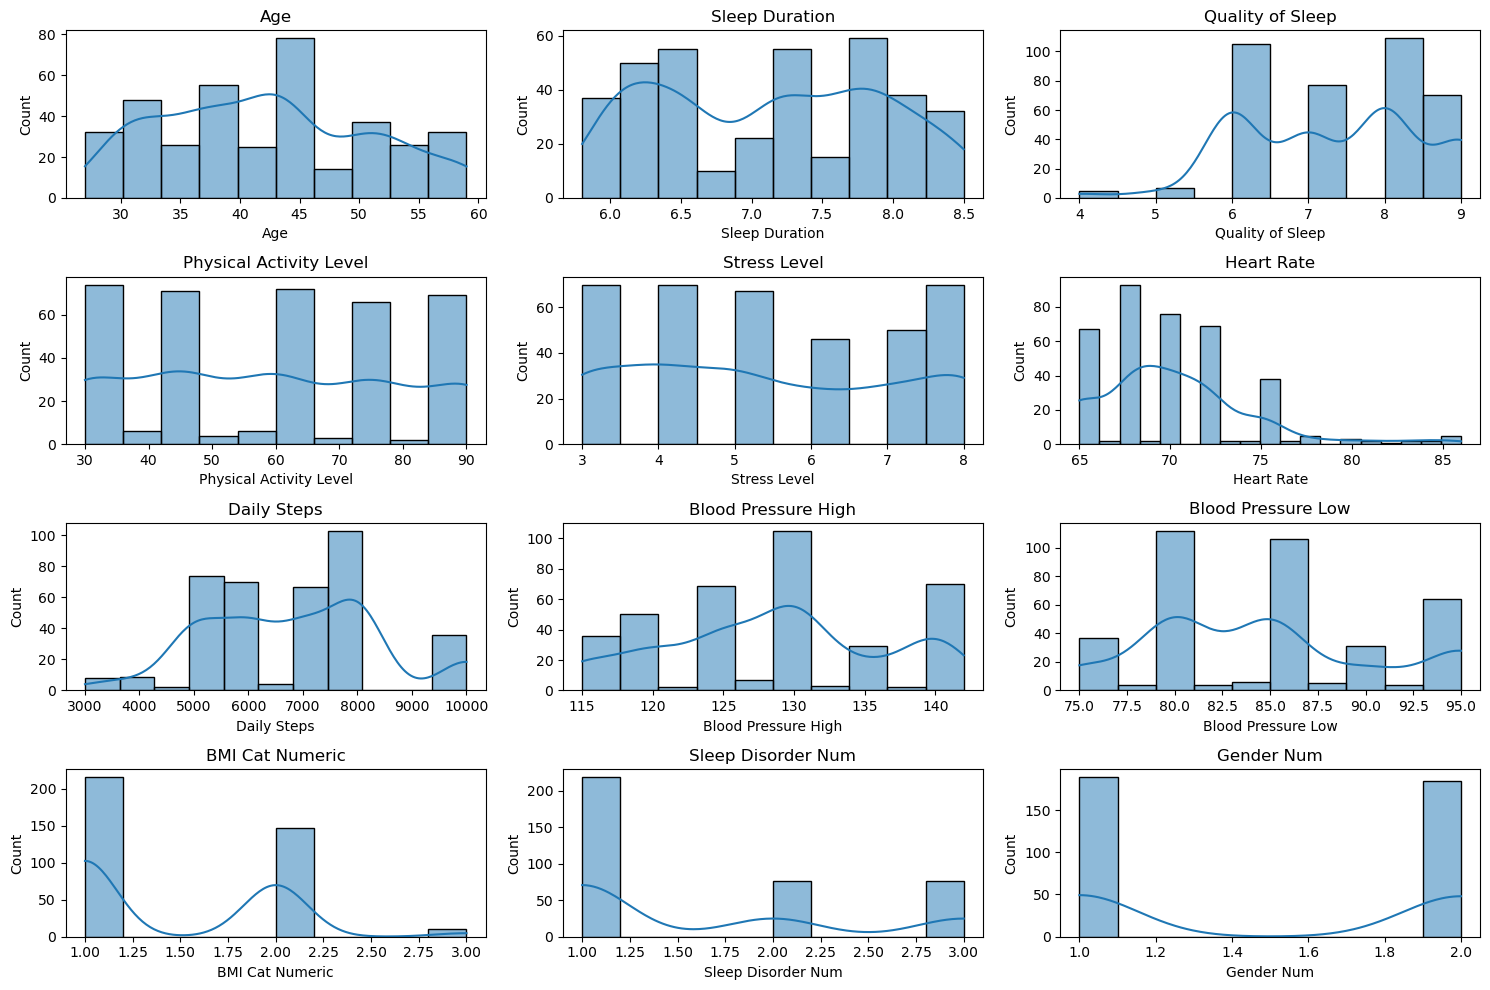

In [14]:
#Explore numeric columns
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                'Physical Activity Level', 'Stress Level', 'Heart Rate', 
                'Daily Steps', 'Blood Pressure High', 'Blood Pressure Low', 
                'BMI Cat Numeric', 'Sleep Disorder Num','Gender Num']
#Plot histograms for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(sleep[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Bivariate Analysis

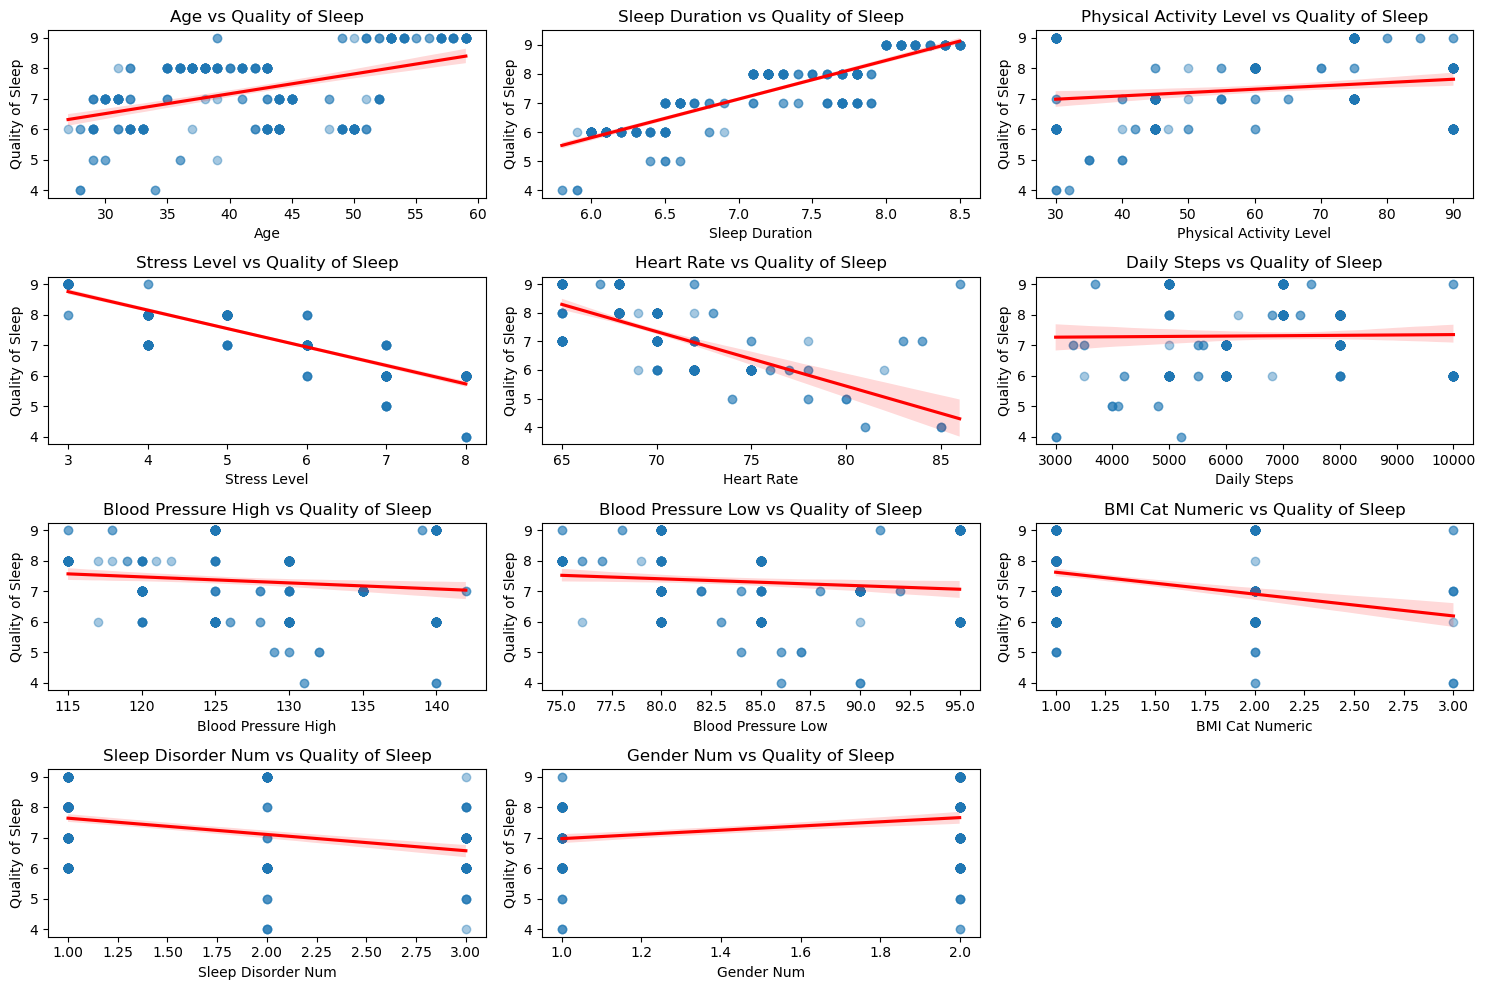

In [15]:
#Pair columns for plotting charts(In this case, we want to find out how different factors affect sleep quality))
pairs_to_plot = [
    ('Age', 'Quality of Sleep'),
    ('Sleep Duration', 'Quality of Sleep'),
    ('Physical Activity Level', 'Quality of Sleep'),
    ('Stress Level', 'Quality of Sleep'),
    ('Heart Rate', 'Quality of Sleep'),
    ('Daily Steps', 'Quality of Sleep'),
    ('Blood Pressure High', 'Quality of Sleep'),
    ('Blood Pressure Low', 'Quality of Sleep'),
    ('BMI Cat Numeric', 'Quality of Sleep'),
    ('Sleep Disorder Num', 'Quality of Sleep'),
    ('Gender Num', 'Quality of Sleep'),
]
#Create charts for each pair of columns
rows = math.ceil(len(pairs_to_plot) / 3)  # Adjusts based on number of pairs
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Convert grid to a flat list for iteration

for i, (x_col, y_col) in enumerate(pairs_to_plot):
    sns.regplot(
        data=sleep,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},  # Semi-transparent points
        line_kws={'color': 'red'},   # Best-fit line color
        ax=axes[i]  # Assign subplot location
    )
    axes[i].set_title(f'{x_col} vs {y_col}', fontsize=12)
    axes[i].set_xlabel(x_col, fontsize=10)
    axes[i].set_ylabel(y_col, fontsize=10)

# Remove any unused subplots to avoid empty charts
for i in range(len(axes)):
    if i >= len(pairs_to_plot):
        axes[i].remove()

plt.tight_layout()
plt.show()

## Multivariate Analysis

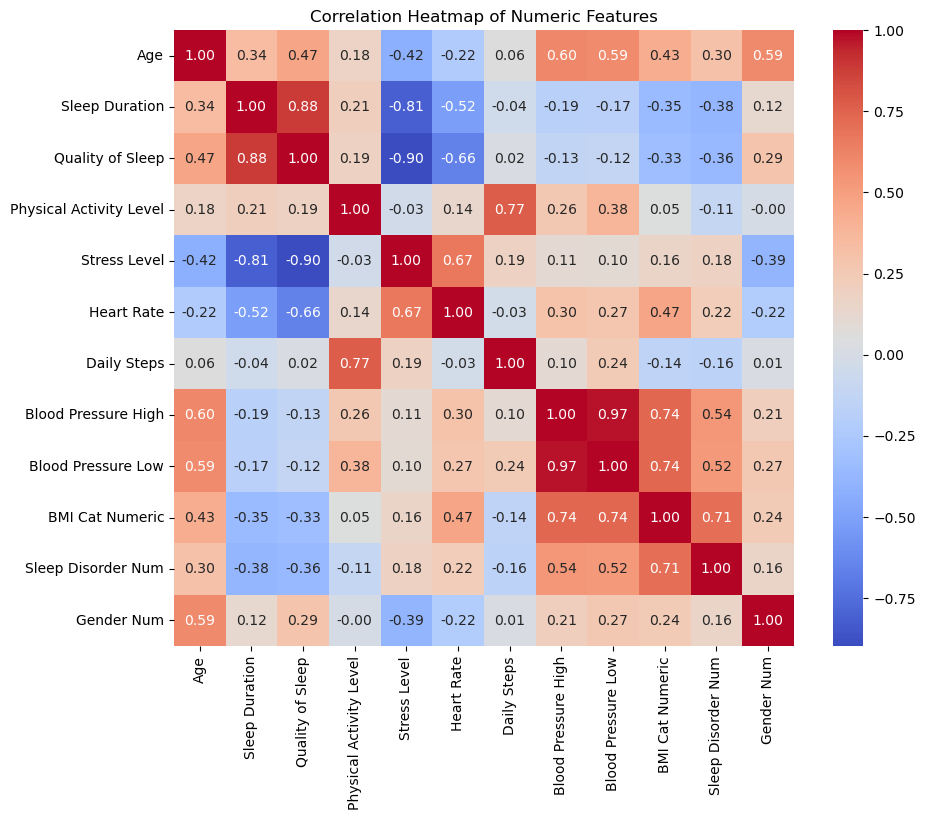

In [18]:
#Plot correlation heatmap for numeric columns
correlation_matrix = sleep[numeric_cols].corr()
#Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Univariate Insights
The dataset contains a demographic of people with generally decent sleep health since they all are within the range of 6-8.5 hours of sleep which is the recommended amount.
### Bivariate Insights
- Sleep Duration vs. Sleep Quality: There seems to be a slight positive trend with longer sleep durations pointing to higher sleep quality.

- Stress Levels vs. Sleep Quality: There is an inverse relationship seen with higher stress levels tending to result in lower sleep quality.

- Physical Activity vs. Sleep Duration: Moderate-to-high physical activity levels appear associated with longer and more consistent sleep durations.

- Heart Rate vs. Sleep Quality: Higher heart rates seem correlated with lower sleep quality, potentially linking to stress or underlying health conditions.

- Blood Pressure vs. Sleep Duration: Some variation exists, but there are slight appearances of higher blood pressure affecting sleep negatively.

- BMI vs. Sleep Quality: Higher BMI values seem to be associated with poorer sleep quality, possibly due to sleep apnea or other health conditions.

- Sleep Disorders vs Sleep Quality: People without sleep disorders seem to have better quality sleep, with the lowest at 6, while people with sleep disorders get poorer quality sleep overall.

- Other factors like Gender and Daily Steps do not seem to have an obvious impact from this dataset, more examples or a deeper look into the data would help verify that.

### Heatmap Insights

#### Positive Correlations

- Similiar to the Bivariate analysis, we can see a strong positive correlation with Sleep Duration, Physical Activity, and Sleep Quality. 

- There is also a strong positive correlation with Daily Steps and Physical Activity, which would then also impact Sleep Quality.

#### Negative Correlations

- There is a strong negative correlation with Stress Level, Heart Rate, BMI, and Sleep Quality. 

- The factors Heart Rate & BMI possibly pointing to health conditions which affect Stress Level hence Sleep Quality.

### Other Insights

- BMI, blood pressure, and stress may interact to increase the likelihood of sleep disorders like insomnia or sleep apnea. We can do further analysis to identify more risk profiles.

- Stress Levels and Heart Rate seem to happen together which might create a compounding effect, this could suggest autonomic nervous system involvement, where stress keeps the body in a heightened state, interfering with restful sleep.
